In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
# import os
# import seaborn as sns
# import statsmodels
# from scipy.stats import shapiro
# from statsmodels.stats.anova import AnovaRM
# from scipy.stats import ttest_rel
# from statsmodels.stats.multitest import multipletests
# import itertools

colorDic = {'blue' : '#6599FF', 'yellow' :'#FFAD33', 'green' : '#198D6D',  'purple': '#683B96', 'red' : '#FF523F', 'orange': '#F97306', 'cyan': '#00FFFF', 'pink': '#FF81C0', 'lime': '#AAFF32', 'brown': '#653700'}
colors = list(colorDic.values())


In [3]:
filename = 'Data/Sorted_Questionaires_Pilot_Study.csv'

df = pd.read_csv(filename, index_col=None, header=0, on_bad_lines = 'skip', delimiter=';')

In [4]:
df2 = df.T.copy()
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:].copy()
df2

Participant ID,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,Baseline_W_BackgroundColor,Baseline_W_Verwendetes Text-File,Baseline_W_ReadingSpeed,...,350_G_Frustration,500_G_BackgroundColor,500_G_Text-File,500_G_Question,500_G_MR,500_G_PR,500_G_TR,500_G_Performance,500_G_Effort,500_G_Frustration
1,24,Männlich,Ausbildung,Kurzsichtig,Keine,Nein,5,W,j,"33,56",...,5,G,k,Nein,18,15,19,17,16,19
2,59,Weiblich,Ux-Designerin,Weitsichtig,Brille,Nein,2,W,a,"32,82",...,8,G,h,Ja,10,5,15,8,12,5
3,25,Weiblich,Studentin,Kurzsichtig,Brille,Nein,2,W,c,"43,61",...,9,G,l,Ja,15,11,14,13,14,14
4,25,Weiblich,Studentin,Keine,Keine,Nein,2,W,h,"27,55",...,1,G,d,Ja,12,9,18,11,15,5
5,41,Weiblich,Wissenschaftliche Mitarbeiterin,Kurzsichtig,Brille,Nein,1,W,h,"35,01",...,4,G,j,Nein,15,4,18,12,6,12
6,57,Männlich,Industrie Designer,Weitsichtig,Lese-Brille,Nein,2,W,h,"30,9",...,10,G,i,Ja,5,5,7,3,7,4
7,25,Männlich,Student,Kurzsichtig,Brille,Nein,4,W,a,"45,49",...,10,G,h,Ja,9,7,13,6,5,8


In [5]:
# Count occurrences of "Ja" and "Nein" in the specified columns
ja_count = df2[["Baseline_W_Question", "Baseline_G_Question", "Baseline_B_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['Baseline_QS'] = ja_count

ja_count = df2[["200_W_Question", "200_B_Question", "200_G_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['200_QS'] = ja_count

ja_count = df2[["350_W_Question", "350_B_Question", "350_G_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['350_QS'] = ja_count

ja_count = df2[["500_W_Question", "500_B_Question", "500_G_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['500_QS'] = ja_count

ja_count = df2[["200_W_Question", "350_W_Question", "500_W_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['W_QS'] = ja_count

ja_count = df2[["200_B_Question", "350_B_Question", "500_B_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['B_QS'] = ja_count

ja_count = df2[["200_G_Question", "350_G_Question", "500_G_Question"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['G_QS'] = ja_count

In [24]:
df2['Alter'].astype('int')
age = df2['Alter']

age = [int(a) for a in age]

import statistics
statistics.stdev(age)

statistics.mean(age)

In [6]:
lstValues = []
lstTicks = ['Baseline', '200', '350', '500', 'W', 'B', 'G']



for column in lstTicks:
    dfX = df2[[column + '_QS']]
    lstValues.append(dfX.values.flatten())

In [7]:
lstValues

[array([3, 1, 3, 2, 3, 1, 3], dtype=int64),
 array([3, 2, 3, 2, 3, 2, 3], dtype=int64),
 array([3, 2, 3, 3, 2, 1, 2], dtype=int64),
 array([2, 3, 3, 3, 2, 2, 2], dtype=int64),
 array([3, 3, 3, 3, 2, 3, 3], dtype=int64),
 array([3, 3, 3, 2, 3, 0, 1], dtype=int64),
 array([2, 1, 3, 3, 2, 2, 3], dtype=int64)]

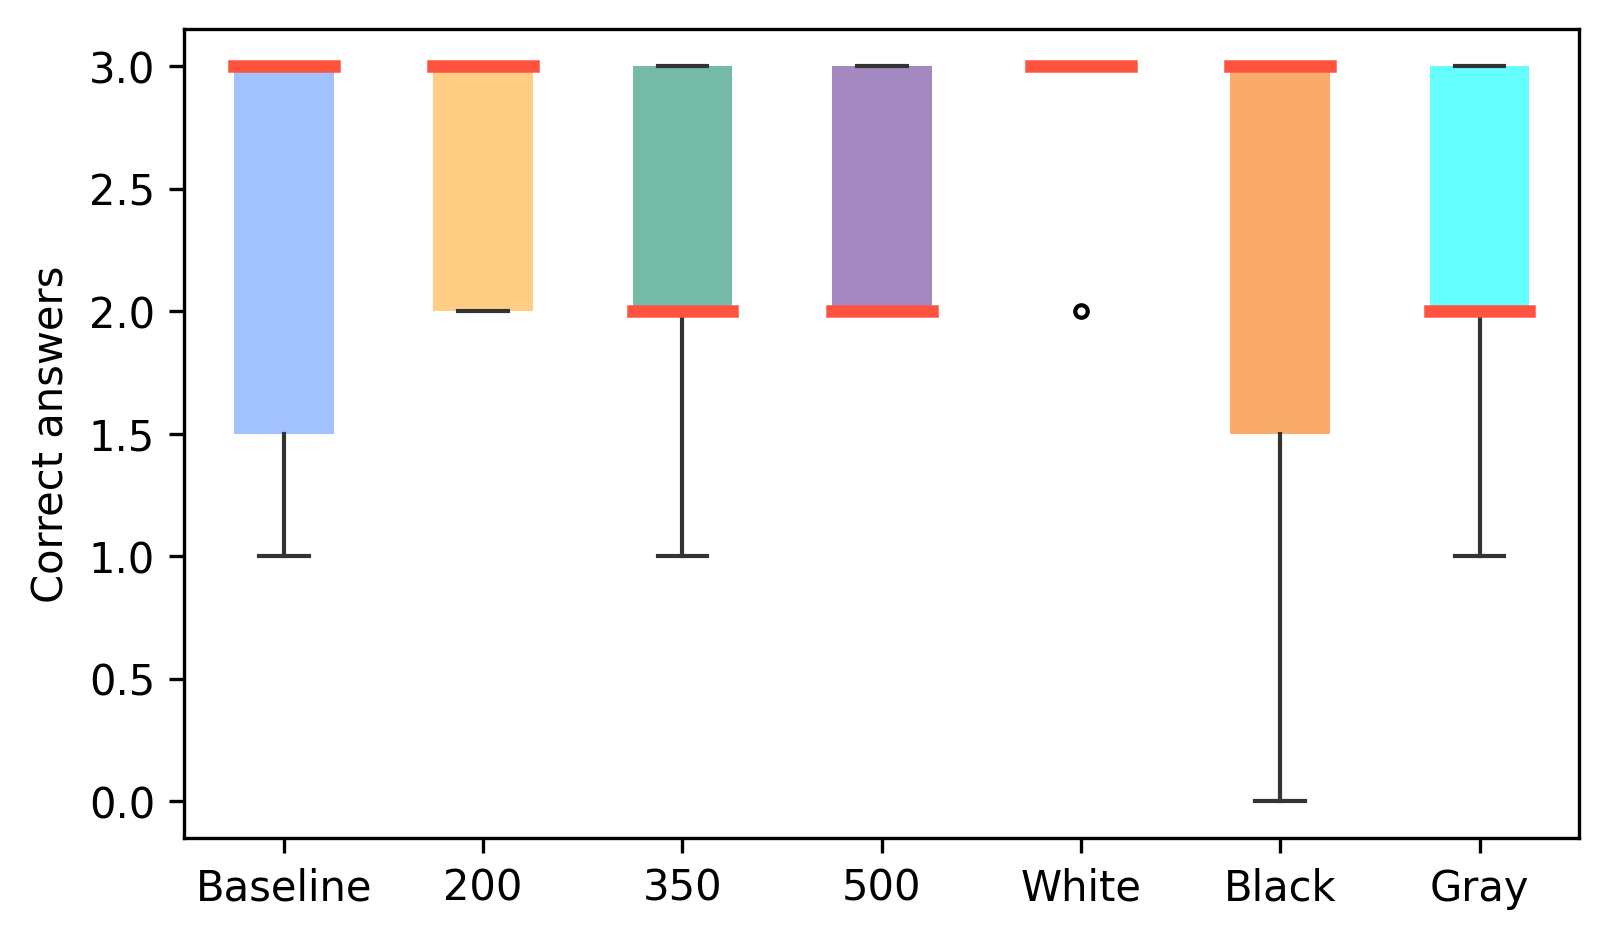

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

lstTicks = ['Baseline', '200', '350', '500', 'White', 'Black', 'Gray']

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Correct answers')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.savefig('./figures/pilot_compresensionquestions_overall.pdf')
plt.show()

In [9]:
# Function to convert time to seconds
def time_to_seconds(time_str):
    if ':' in time_str:
        parts = time_str.split(':')
        minutes = int(parts[0])
        seconds = float(parts[1].replace(',', '.'))
        total_seconds = minutes * 60 + seconds
    else:
        total_seconds = float(time_str.replace(',', '.'))
    return total_seconds

# df2['nRS_seconds'] = df2[['Baseline_ReadingSpeed']].apply(time_to_seconds)

In [10]:
# df2.nRS_seconds.values.flatten()

AttributeError: 'DataFrame' object has no attribute 'nRS_seconds'

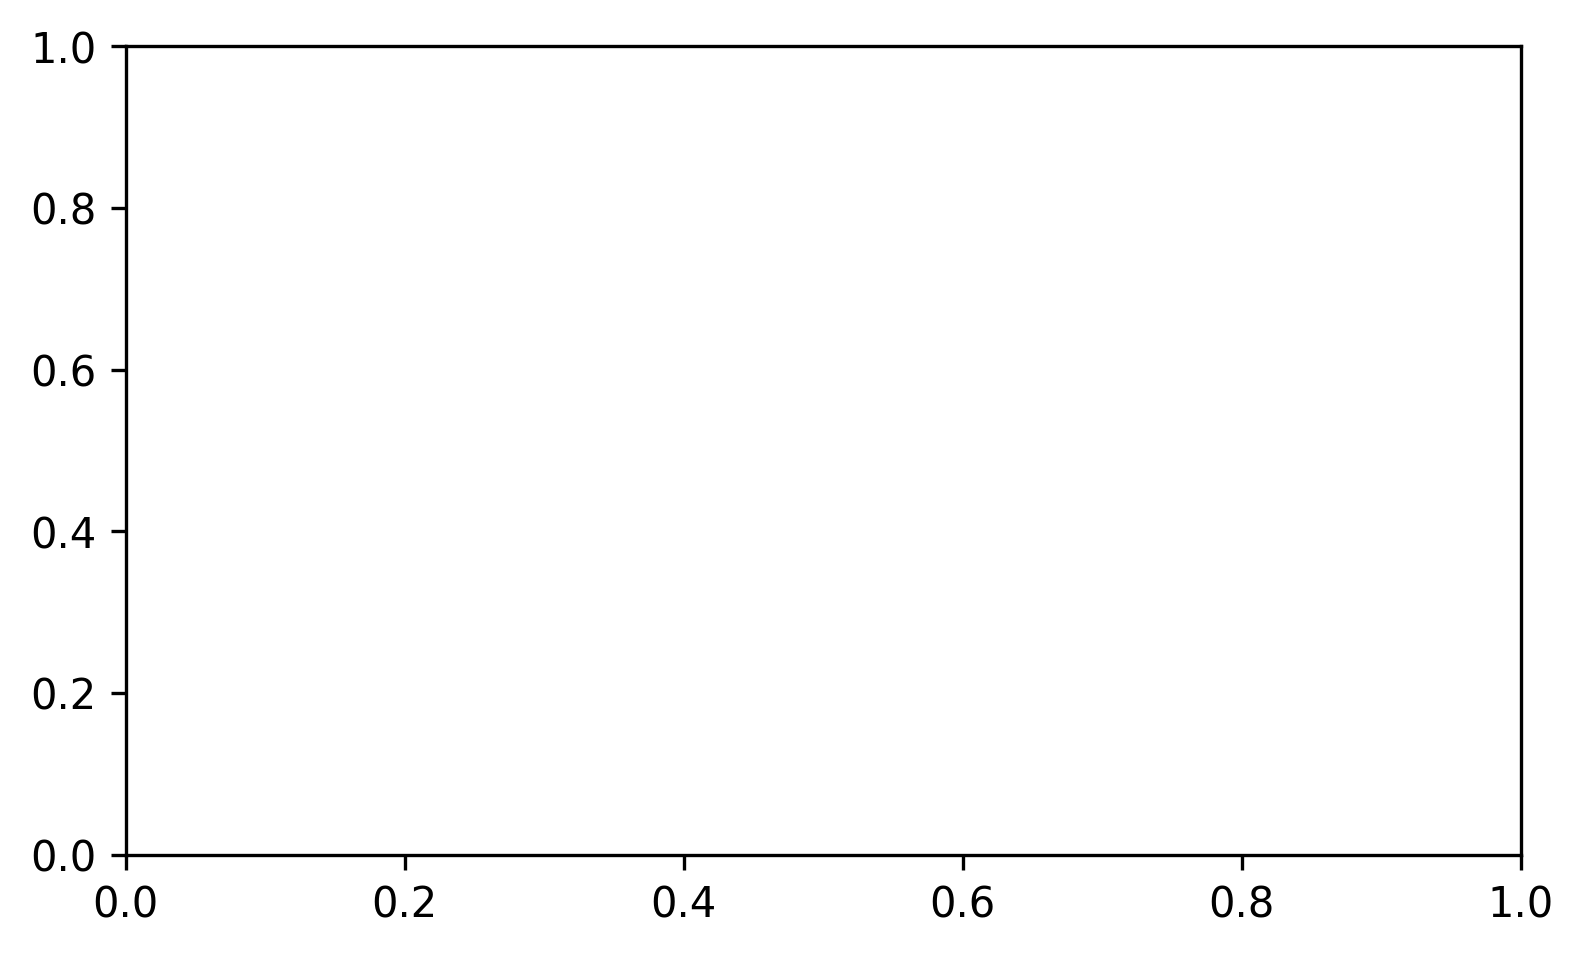

In [11]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(df2.nRS_seconds.values.flatten(),
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Reading Time (s)')
# ax.set_xticklabels('Pdf reading')
# ax.set_xticks([''])
# ax.set_xticks(range(1, len(lstTicks)+1), 'Pdf Reading')
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.tick_params(bottom=False)
plt.show()

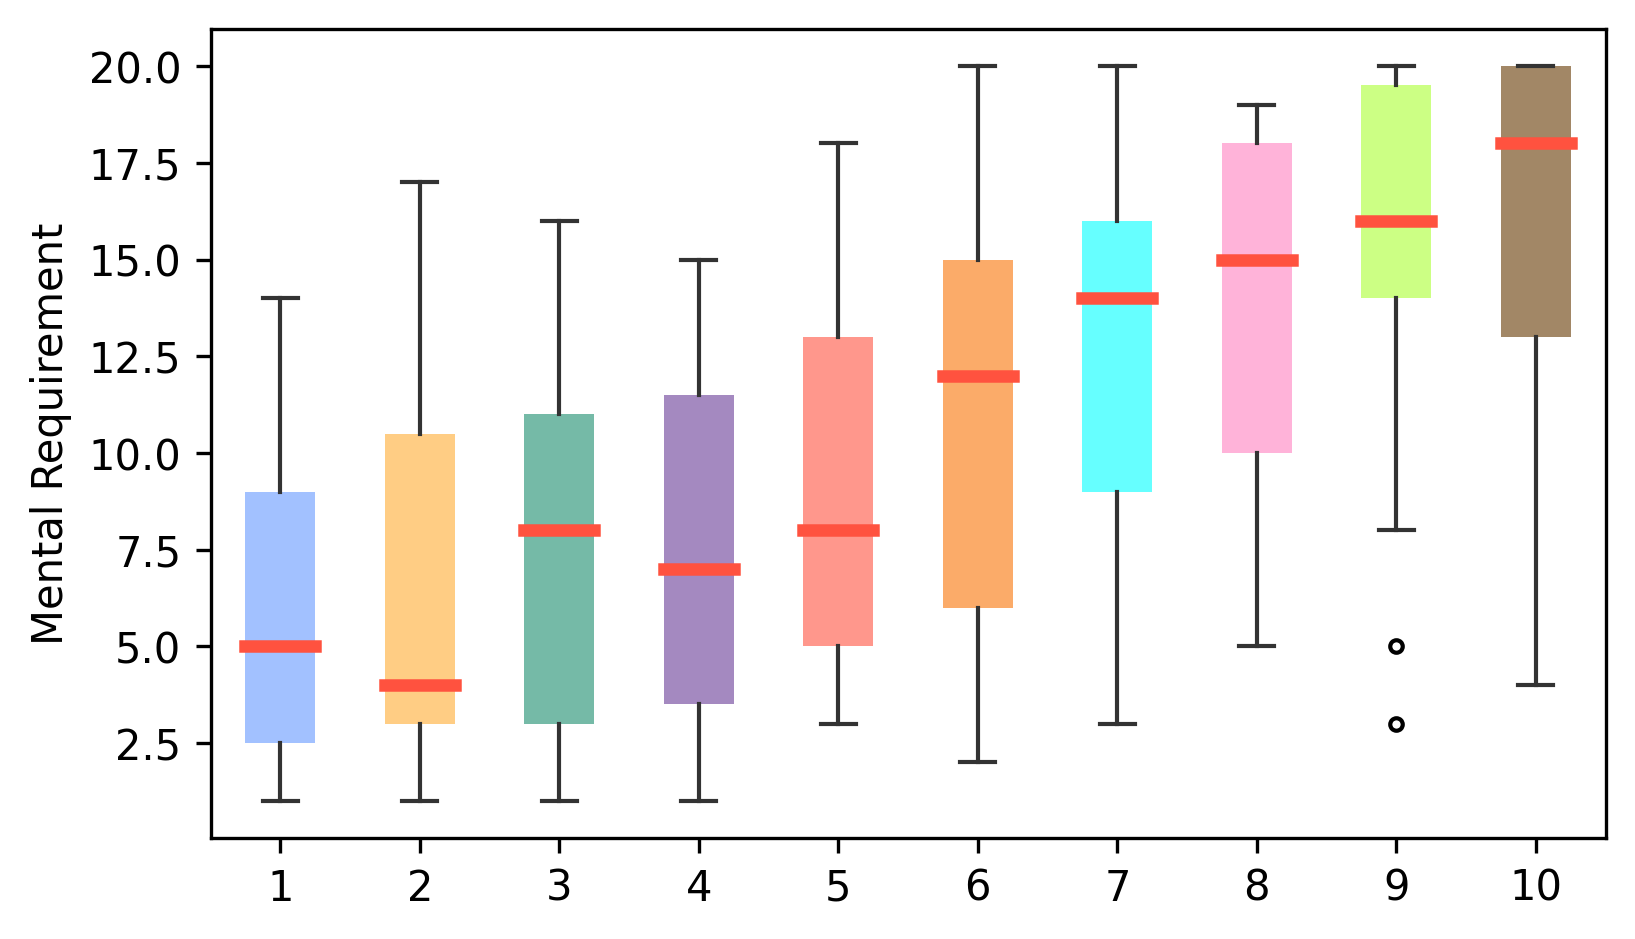

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_MR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Mental Requirement')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

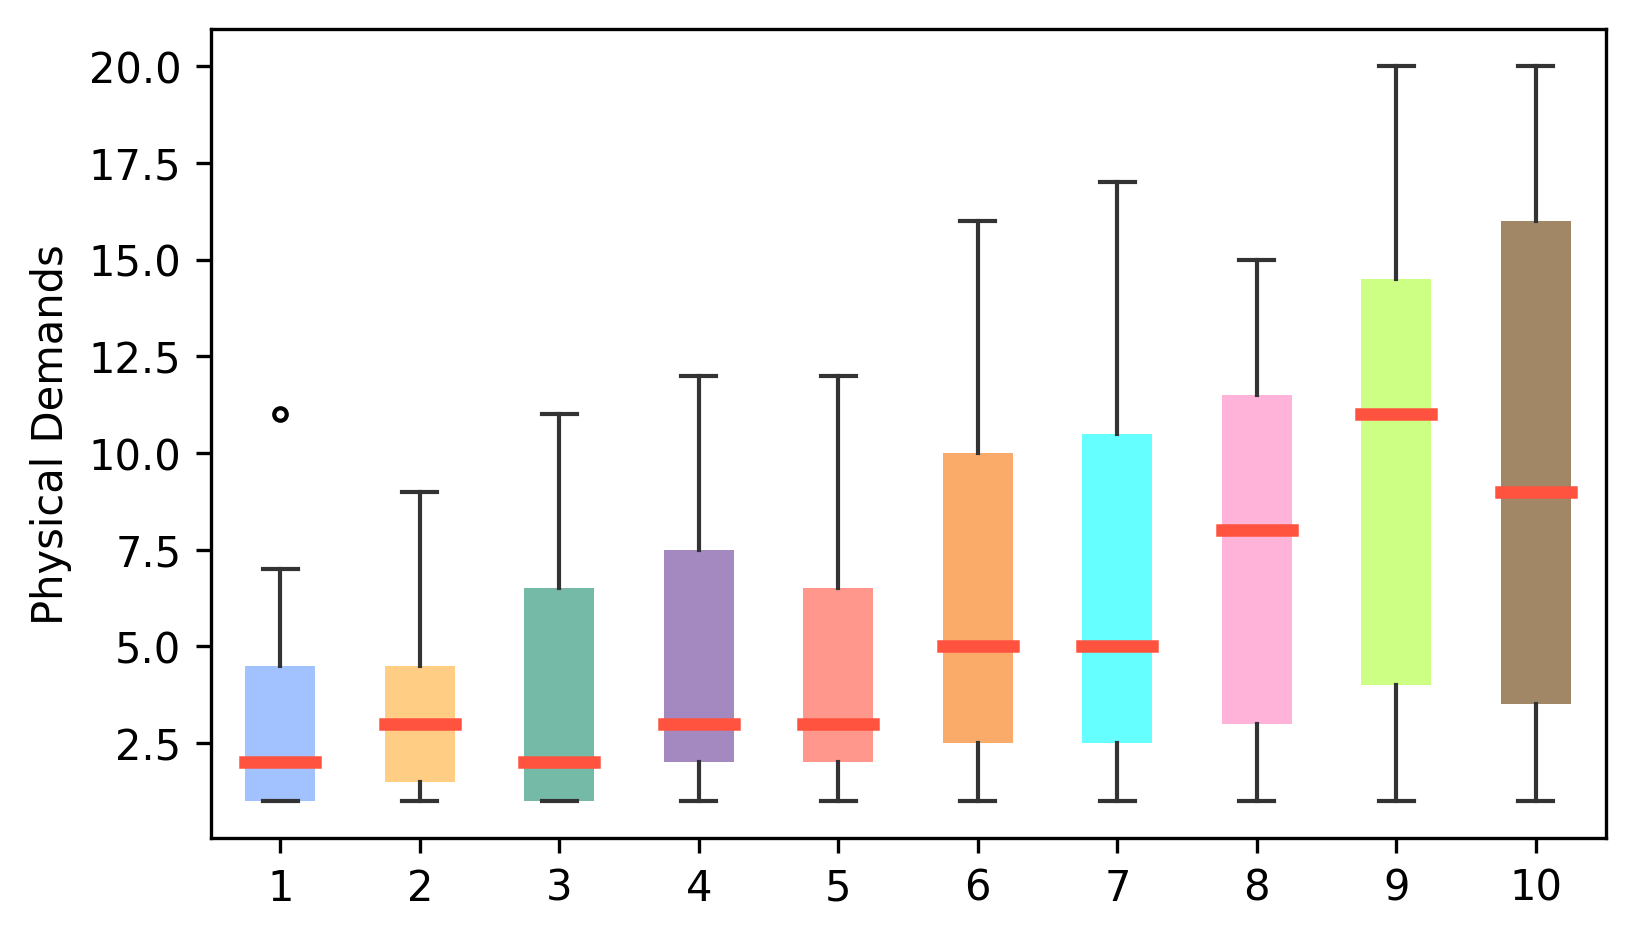

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_PR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Physical Demands')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

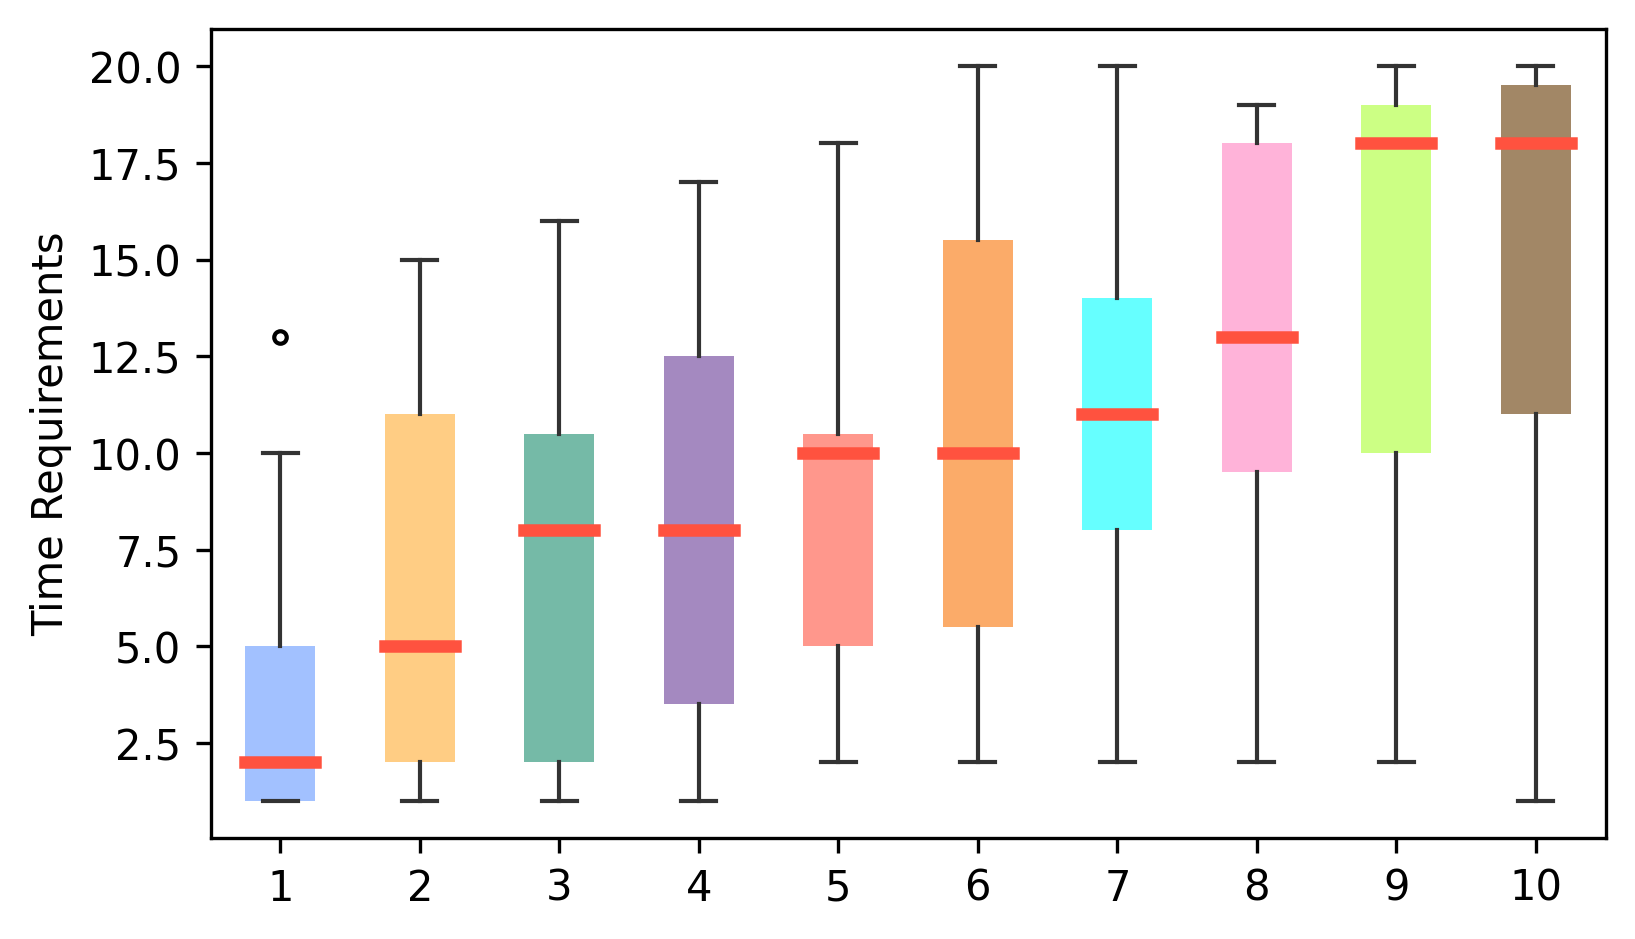

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_TR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Time Requirements')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

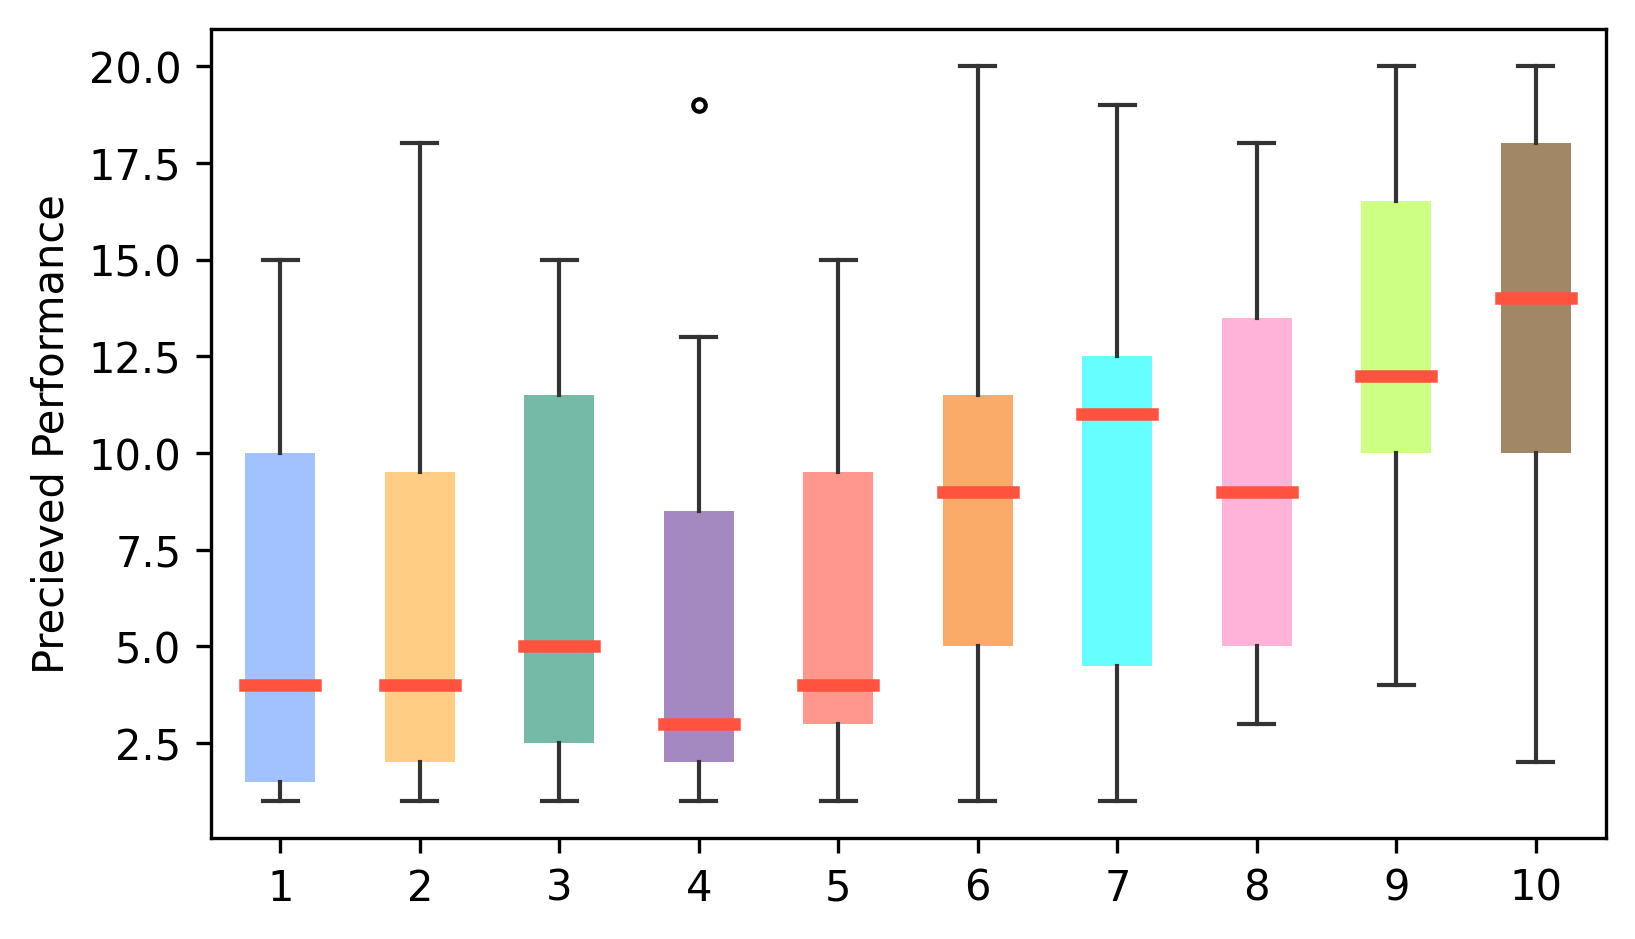

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Performance']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Precieved Performance')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

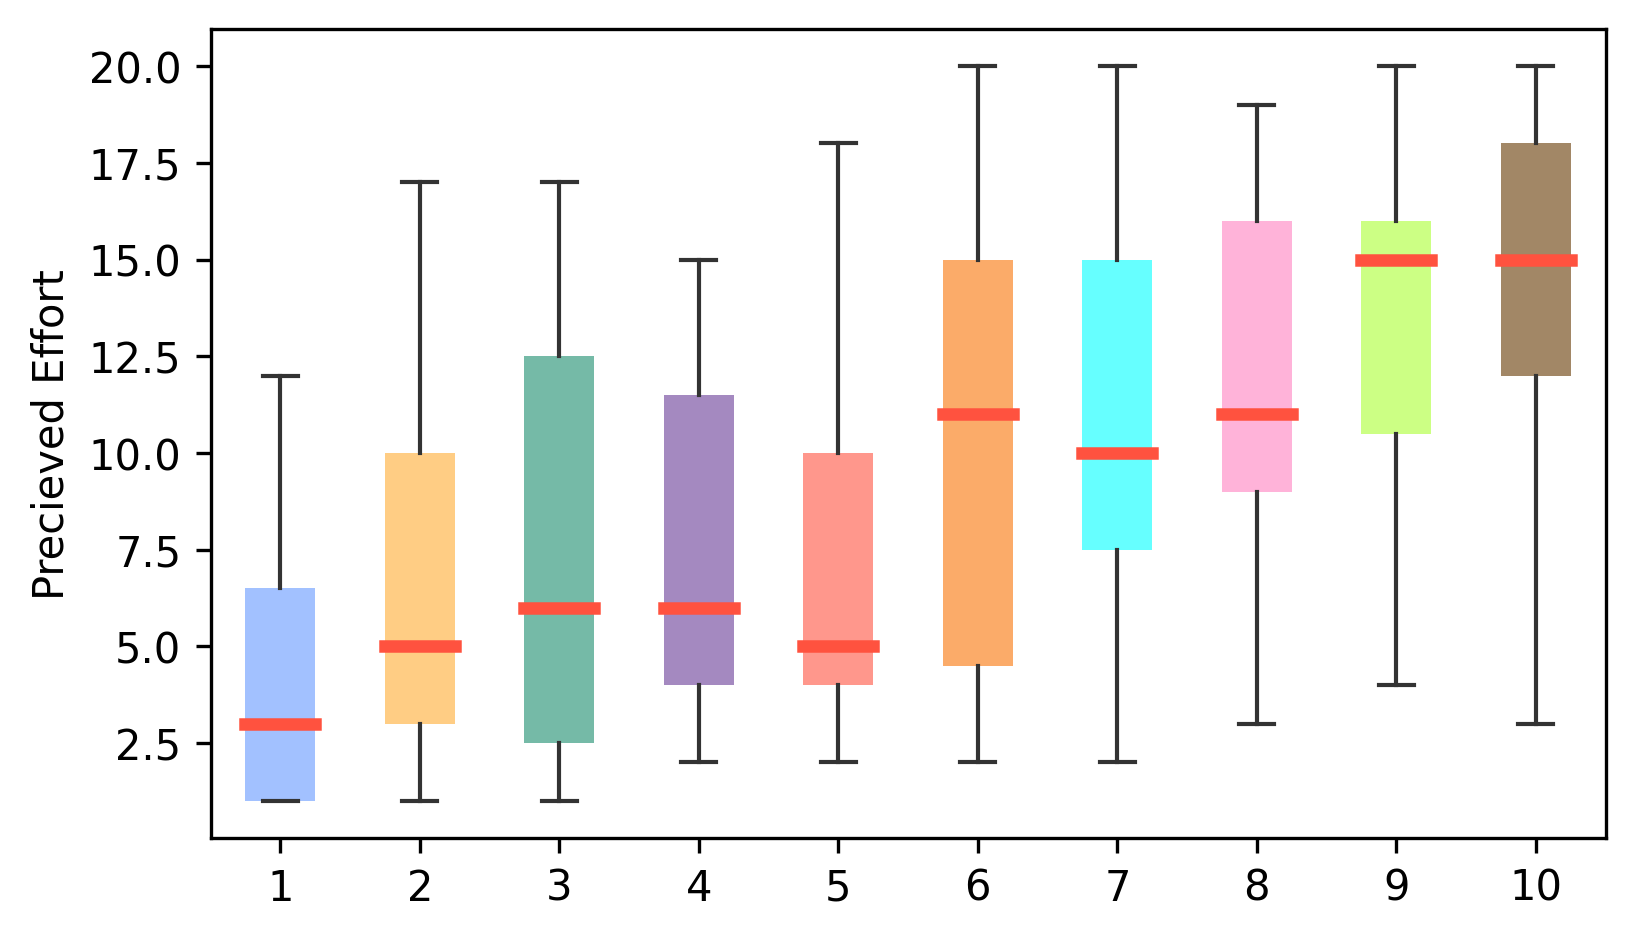

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Effort']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Precieved Effort')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

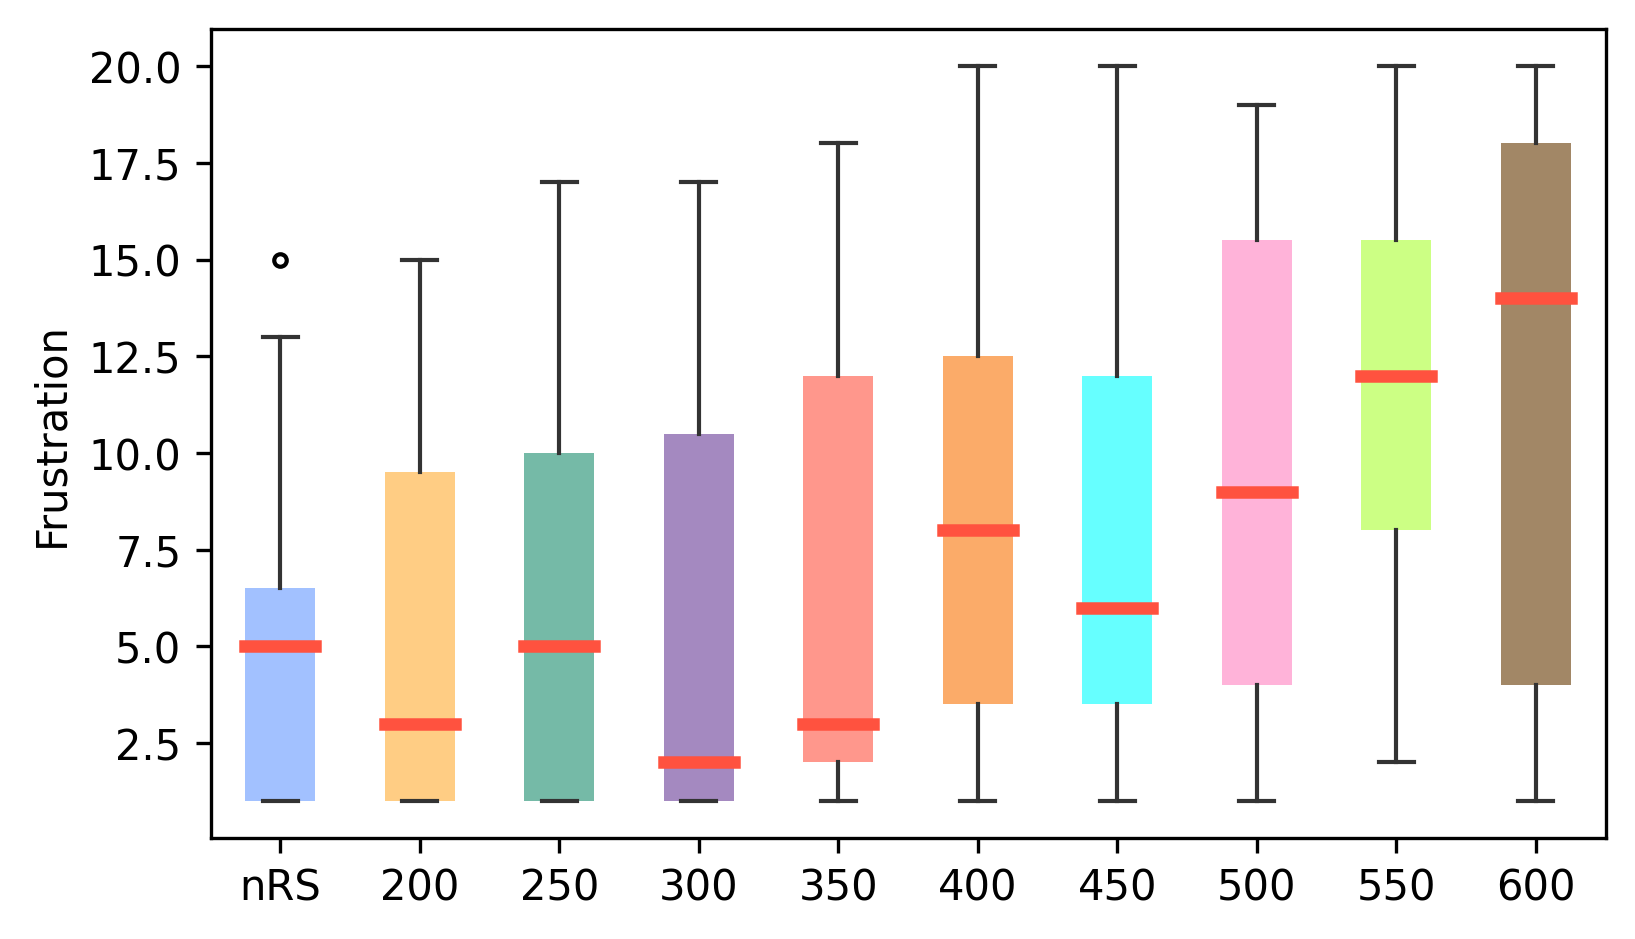

In [ ]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Frustration']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Frustration')
# ax.set_xticks('')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

In [ ]:
df2.to_pickle('./Data/Questionaire_Pilot.pkl')

In [ ]:
import itertools
column_names = ['MR', 'PR', 'TR', 'Performance', 'Effort', 'Frustration']
combinations = list(itertools.product(['W_', 'B_', 'G_'], column_names))

In [ ]:
flattenend_combinations = []
seperator = ''

for row in combinations:
    flattenend_combinations.append(seperator.join(row))
flattenend_combinations

['W_MR',
 'W_PR',
 'W_TR',
 'W_Performance',
 'W_Effort',
 'W_Frustration',
 'B_MR',
 'B_PR',
 'B_TR',
 'B_Performance',
 'B_Effort',
 'B_Frustration',
 'G_MR',
 'G_PR',
 'G_TR',
 'G_Performance',
 'G_Effort',
 'G_Frustration']

In [ ]:


columns_to_sum = [f'Baseline_{col}' for col in flattenend_combinations]
lst = df2[columns_to_sum].values
lst = [np.array(arr, dtype=int).sum() for arr in lst]    
df2['Baseline_Sum'] = lst



for i in ['200_W', '200_B', '200_G', '350_W', '350_B', '350_G', '500_W', '500_B', '500_G']:
    columns_to_sum = [f'{i}_{col}' for col in column_names]
    lst = df2[columns_to_sum].values
    lst = [np.array(arr, dtype=int).sum() for arr in lst]    
    df2[f'{i}_Sum'] = lst

df2

Participant ID,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,Baseline_W_BackgroundColor,Baseline_W_Verwendetes Text-File,Baseline_W_ReadingSpeed,...,Baseline_Sum,200_W_Sum,200_B_Sum,200_G_Sum,350_W_Sum,350_B_Sum,350_G_Sum,500_W_Sum,500_B_Sum,500_G_Sum
1,24,Männlich,Ausbildung,Kurzsichtig,Keine,Nein,5,W,j,"33,56",...,104,34,18,15,70,67,52,99,108,104
2,59,Weiblich,Ux-Designerin,Weitsichtig,Brille,Nein,2,W,a,"32,82",...,39,6,7,9,54,12,41,47,48,55
3,25,Weiblich,Studentin,Kurzsichtig,Brille,Nein,2,W,c,"43,61",...,57,38,37,55,57,52,57,64,80,81
4,25,Weiblich,Studentin,Keine,Keine,Nein,2,W,h,"27,55",...,30,10,11,22,10,74,21,66,34,70
5,41,Weiblich,Wissenschaftliche Mitarbeiterin,Kurzsichtig,Brille,Nein,1,W,h,"35,01",...,77,12,11,33,42,48,28,53,75,67
6,57,Männlich,Industrie Designer,Weitsichtig,Lese-Brille,Nein,2,W,h,"30,9",...,33,22,80,26,70,58,60,66,108,31
7,25,Männlich,Student,Kurzsichtig,Brille,Nein,4,W,a,"45,49",...,72,75,18,34,25,91,36,80,62,48


In [ ]:
df2

Participant ID,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,Baseline_W_BackgroundColor,Baseline_W_Verwendetes Text-File,Baseline_W_ReadingSpeed,...,Baseline_Sum,200_W_Sum,200_B_Sum,200_G_Sum,350_W_Sum,350_B_Sum,350_G_Sum,500_W_Sum,500_B_Sum,500_G_Sum
1,24,Männlich,Ausbildung,Kurzsichtig,Keine,Nein,5,W,j,"33,56",...,104,34,18,15,70,67,52,99,108,104
2,59,Weiblich,Ux-Designerin,Weitsichtig,Brille,Nein,2,W,a,"32,82",...,39,6,7,9,54,12,41,47,48,55
3,25,Weiblich,Studentin,Kurzsichtig,Brille,Nein,2,W,c,"43,61",...,57,38,37,55,57,52,57,64,80,81
4,25,Weiblich,Studentin,Keine,Keine,Nein,2,W,h,"27,55",...,30,10,11,22,10,74,21,66,34,70
5,41,Weiblich,Wissenschaftliche Mitarbeiterin,Kurzsichtig,Brille,Nein,1,W,h,"35,01",...,77,12,11,33,42,48,28,53,75,67
6,57,Männlich,Industrie Designer,Weitsichtig,Lese-Brille,Nein,2,W,h,"30,9",...,33,22,80,26,70,58,60,66,108,31
7,25,Männlich,Student,Kurzsichtig,Brille,Nein,4,W,a,"45,49",...,72,75,18,34,25,91,36,80,62,48


In [ ]:
lstValues = []
lstTicks = ['Baseline', '200', '350', '500', 'W', 'B', 'G']

for column in lstTicks:
    names = list(filter(lambda x: column in x, df2.columns))
    names = list(filter(lambda x: '_Sum' in x, names))
    dfX = df2[names]
    lstValues.append(dfX.values.flatten())
    

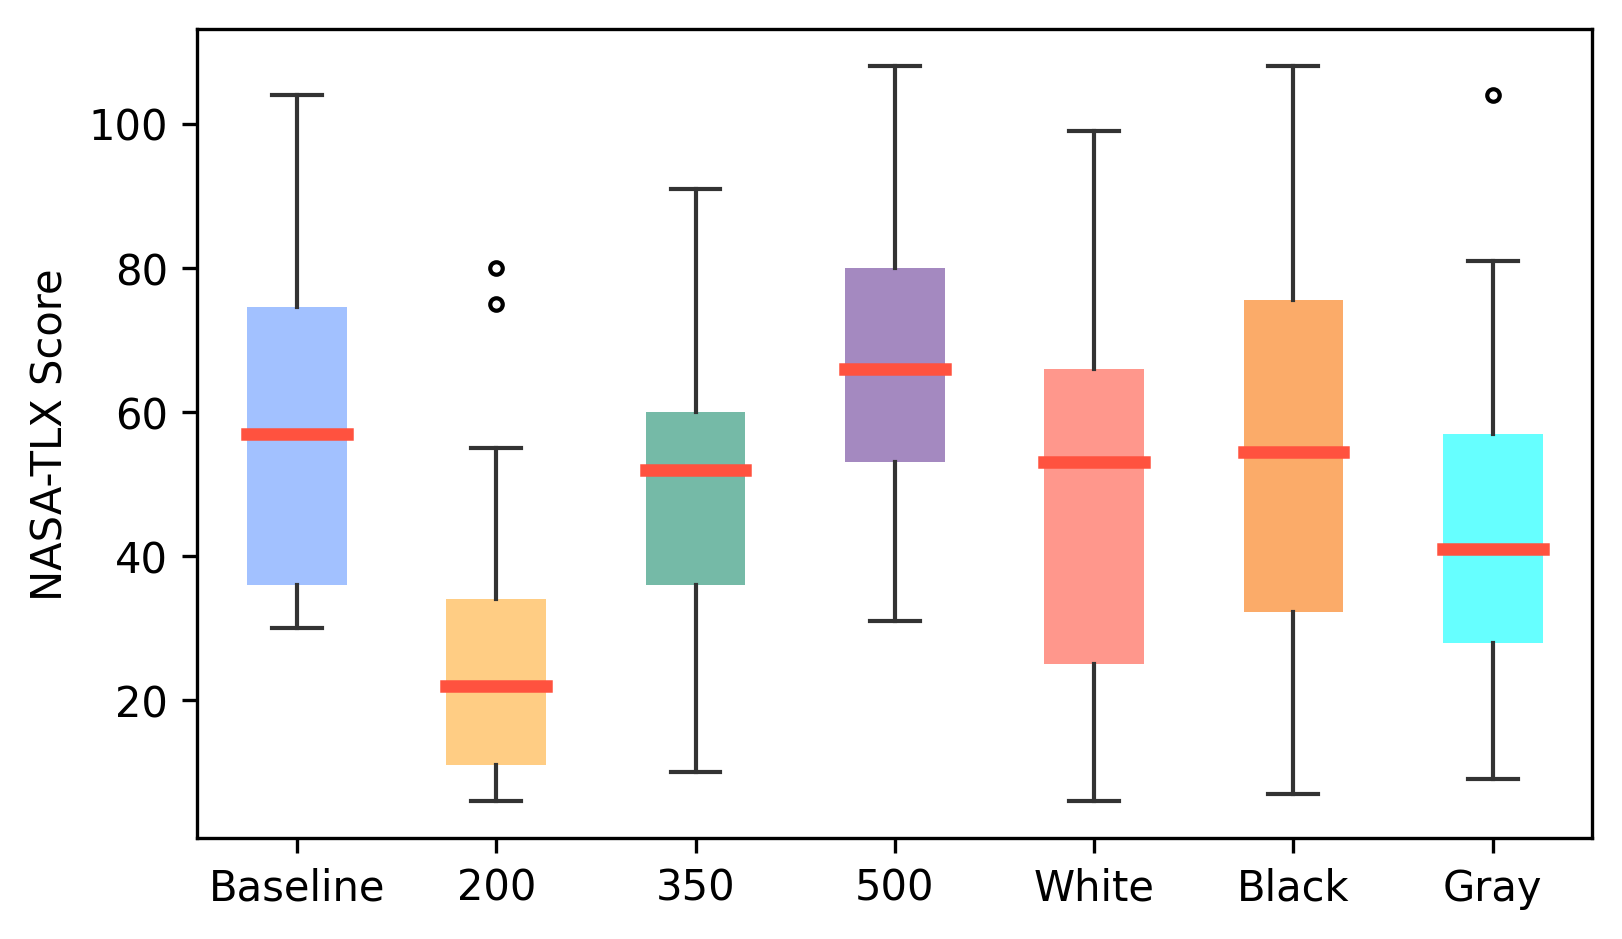

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            # positions=[1, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7],
            # widths = 0.25, 
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

lstTicks = ['Baseline', '200', '350', '500', 'White', 'Black', 'Gray']

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('NASA-TLX Score')
# ax.set_xticks('')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.savefig('./figures/pilot_nasatlx_overall.pdf')
plt.show()